In [1]:
import numpy as np
from scipy.fftpack import fft, ifft
from scipy.signal import butter, lfilter
import scipy as sp
import matplotlib.pyplot as plt
from pylab import *


from time import perf_counter
import pandas as pd

from sympy import *

%matplotlib tk

In [2]:
l1 = 36.98494e-3;
l2 = 120.777e-3;
mcrank = 3.7191;
mrod = 283.35e-3;
I2 = 662523.4802e-9;
lg = 28.5827e-3;
mp = 417.63e-3;
engine_speed_rpm = 3600

In [12]:
theta = np.array(np.arange(0,720.1,0.1))*np.pi/180
theta_deg = np.array(np.arange(0,720.1,0.1))

In [4]:
theta

array([0.00000000e+00, 1.74532925e-03, 3.49065850e-03, ...,
       1.25628800e+01, 1.25646253e+01, 1.25663706e+01])

In [5]:
theta_d = engine_speed_rpm*2*np.pi/60
theta_d

376.99111843077515

In [6]:
theta_dd = 0

In [7]:
beta = np.arcsin(l1*np.sin(theta)/l2)
beta

array([ 0.00000000e+00,  5.34463250e-04,  1.06892502e-03, ...,
       -1.06892502e-03, -5.34463250e-04, -1.50006999e-16])

In [8]:
con1 = (1-(np.square(l1*np.sin(theta)/l2)))

In [9]:
beta_d = (theta_d*l1*np.cos(theta))/(l2*np.sqrt(con1))

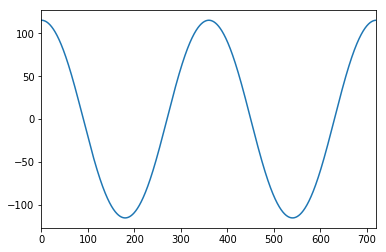

In [14]:
plt.plot(theta_deg,beta_d)
plt.xlim(0,720)
plt.show()

In [11]:
a_beta_dd = l1*((theta_dd*np.cos(theta))-((np.square(theta_d))*np.sin(theta)))
b_beta_dd = l2*np.sqrt(con1)
c_beta_dd = np.square(theta_d)*np.power(l1,3)*np.square(np.cos(theta))*np.sin(theta)
d_beta_dd = np.power(l2,3)*con1

beta_dd= (a_beta_dd/b_beta_dd)+(c_beta_dd/d_beta_dd)

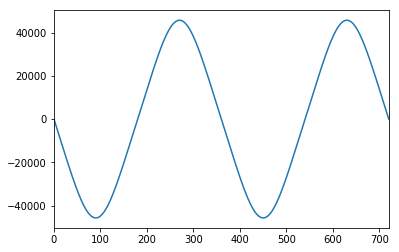

In [15]:
plt.plot(theta_deg,beta_dd)
plt.xlim(0,720)
plt.show()

In [17]:
a_vpis = (l1*theta_d*np.sin(theta))
b_vpis = (np.square(l1)*theta_d*np.sin(2*theta))
c_vpis = 2*l2*np.sqrt(con1)

vpis = -a_vpis-(b_vpis/c_vpis)

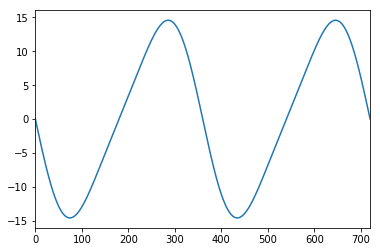

In [18]:
plt.plot(theta_deg,vpis)
plt.xlim(0,720)
plt.show()

In [19]:
a_arx = l1*theta_dd*np.sin(theta)
b_arx = l1*(np.square(theta_d))*np.cos(theta)
c_arx = theta_dd*lg*np.square(l1)*np.sin(2*theta)
d_arx = 2*np.square(l2)*np.sqrt(con1)
e_arx = np.square(l2)*(2*con1)
f_arx = np.square(theta_d*l1)*lg
g_arx = 2*np.cos(2*theta)*np.sqrt(con1)
h_arx = np.square(l1*np.sin(2*theta))
i_arx = 2*np.square(l2)*np.sqrt(con1)
arx = -a_arx-b_arx-(c_arx/d_arx)-(1/e_arx)*f_arx*(g_arx+(h_arx/i_arx))

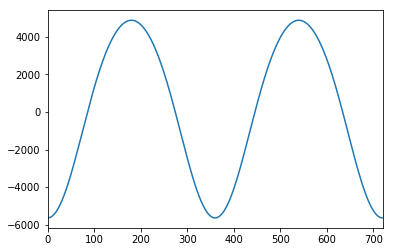

In [21]:
plt.plot(theta_deg,arx)
plt.xlim(0,720)
plt.show()

In [22]:
a_ary = l1*theta_dd*np.cos(theta)
b_ary = l1*np.square(theta_d)*np.sin(theta)
c_ary = lg*l1*theta_dd*np.cos(theta)/l2
d_ary = lg*l1*theta_d*np.sin(theta)/l2
ary = a_ary - b_ary - c_ary+d_ary

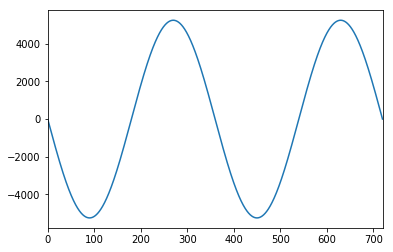

In [23]:
plt.plot(theta_deg,ary)
plt.xlim(0,720)
plt.show()

In [24]:
a_apx = l1*theta_dd*np.sin(theta)
b_apx = l1*(np.square(theta_d))*np.cos(theta)
c_apx = theta_dd*np.square(l1)*np.sin(2*theta)
d_apx = 2*l2*np.sqrt(con1)
e_apx = l2*(2*con1)
f_apx = np.square(theta_d*l1)
g_apx = 2*np.cos(2*theta)*np.sqrt(con1)
h_apx = np.square(l1*np.sin(2*theta))
i_apx = 2*np.square(l2)*np.sqrt(con1)
apx = -a_apx-b_apx-(c_apx/d_apx)-(1/e_apx)*f_apx*(g_apx+(h_apx/i_apx))

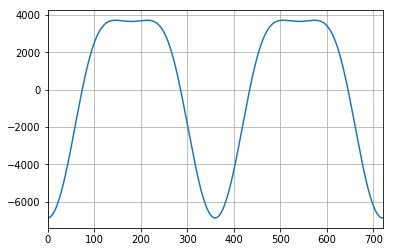

In [26]:
plt.plot(theta_deg,apx)
plt.xlim(0,720)
plt.grid()
plt.show()

In [ ]:
len(apx)

In [ ]:
fpx = mp*apx*np.pi